In [38]:
import sys
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Add the parent directory to path to import environments
sys.path.append(os.path.abspath('.'))
from environments.battleship_logic import BattleshipGame, BattleshipConfig

In [49]:
N_GAMES = 100
GRID_WIDTH = 5
GRID_HEIGHT = 5
SEED = 42

fleet_spec = {3: 2} # Standard Battleship config

In [50]:
def check_win(game):
    # Check if all ships are sunk
    # 0=Water, 1..N=Ship IDs
    # shots: 2=Hit
    
    unique_ships = np.unique(game.ship_id_grid)
    for s_id in unique_ships:
        if s_id == 0: continue
        # Check if all cells for this ship ID are hit
        s_cells = (game.ship_id_grid == s_id)
        if not np.all(game.shots_grid[s_cells] == 2):
            return False
    return True

In [51]:
class RandomAgent:
    def __init__(self, width, height, seed=None):
        self.width = width
        self.height = height
        self.rng = random.Random(seed)
        
    def get_action(self, shots_grid):
        rows, cols = np.where(shots_grid == 0)
        available_moves = list(zip(rows, cols))
        move = self.rng.choice(available_moves)
        # print(move)
        return move

In [52]:
results = []

print(f"Simulating {N_GAMES} games...")
for i in tqdm(range(N_GAMES)):
    # Initialize Game
    # Using a random seed for board generation for each game
    game = BattleshipGame(GRID_WIDTH, GRID_HEIGHT, fleet_spec, seed=None) 
    
    # Initialize Agent
    agent = RandomAgent(GRID_WIDTH, GRID_HEIGHT, seed=None)
    
    steps = 0
    while True:
        steps += 1
        r, c = agent.get_action(game.shots_grid)
        
        # Apply shot mechanism manually as per BattleshipGame logic
        if game.board[r, c] == 1:
            # It is a hit
            game.shots_grid[r, c] = 2 
        else:
            # It is a miss
            game.shots_grid[r, c] = 1 
            
        if check_win(game):
            results.append(steps)
            break

Simulating 100 games...


100%|██████████| 100/100 [00:00<00:00, 918.76it/s]


Results for 100 games trying to find all ships on 5x5 grid:
Average moves: 22.56
Median moves: 23.0
Min moves: 11
Max moves: 25


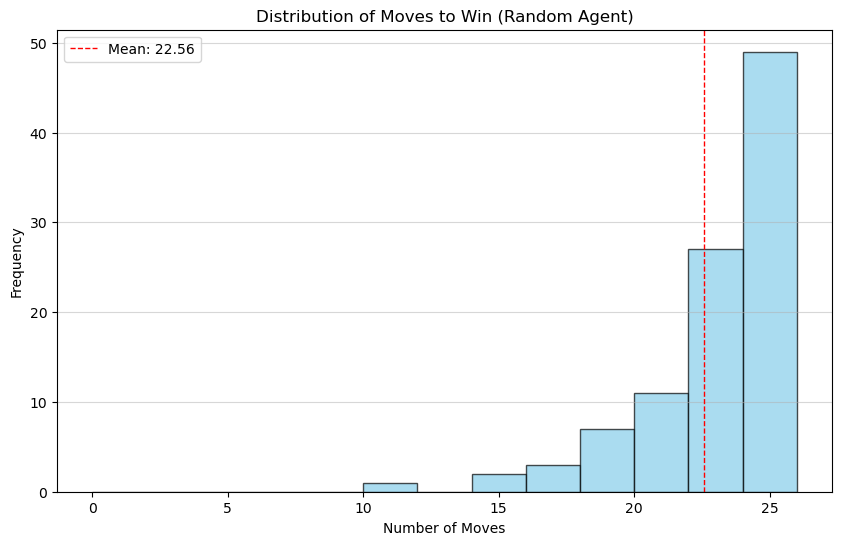

In [53]:
print(f"Results for {N_GAMES} games trying to find all ships on {GRID_WIDTH}x{GRID_HEIGHT} grid:")
print(f"Average moves: {np.mean(results):.2f}")
print(f"Median moves: {np.median(results)}")
print(f"Min moves: {np.min(results)}")
print(f"Max moves: {np.max(results)}")

plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(0, GRID_WIDTH * GRID_HEIGHT + 2, 2), alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f"Distribution of Moves to Win (Random Agent)")
plt.xlabel("Number of Moves")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
plt.axvline(np.mean(results), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.mean(results):.2f}')
plt.legend()
plt.show()

# PLay yoself

In [9]:
game = BattleshipGame(GRID_WIDTH, GRID_HEIGHT, fleet_spec, seed=None)

In [33]:
game.shots_grid[3, 4] = 2 

In [34]:
game.ship_id_grid

array([[0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [2, 0, 1, 1, 1],
       [0, 0, 0, 0, 0]])

In [35]:
game.board

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0]])

In [36]:
game.shots_grid

array([[0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [2, 1, 2, 2, 2],
       [0, 0, 0, 0, 0]])

In [37]:
check_win(game)

True